In [5]:
import numpy as np

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [6]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## Problem One: Data visualization

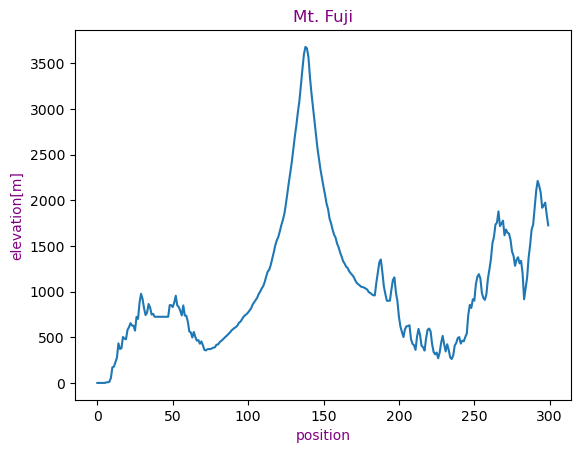

In [7]:
import matplotlib.pyplot as plt

plt.title("Mt. Fuji", c="purple")
plt.xlabel("position", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()

## Problem Two: Create a function to calculate the gradient at a certain point

In [13]:
# creating a function to calculate the gradient of descent at a certain point
def compute_gradient(given_point):
    # returning 0 if the given input is 0 to avoid indexing the last element in the array as 0-1 yields -1
    if given_point == 0:
        return 0
    change_in_y = fuji[given_point, 3]-fuji[given_point-1, 3]
    change_in_x = fuji[given_point, 0]-fuji[given_point-1, 0]
    return change_in_y/change_in_x
    

print(compute_gradient(0))

0


## Problem Three: Create a function to calculate the destination point

In [14]:
def compute_next_point(curr_loc, array_length, alpha=0.2):
    # ensuring that the current location lies between 0 and 300
    if curr_loc > array_length-1 or curr_loc < 0:
        raise ValueError("curr_loc should be greater or equal to zero and less than or equal to 299")
    dest_point = np.maximum(1, curr_loc  - alpha * compute_gradient(curr_loc))
    dest_point = np.minimum(dest_point, array_length-1)
    return round(dest_point)


array_length = len(fuji[:, 0])
compute_next_point(10, array_length)

1

## Problem Four: Create a function to go down the mountain

In [15]:
def descend_mountain(first_position, array_length, alpha=0.2):
    points = [first_position]
    while points[-1] not in points[:-1]:
        points.append(compute_next_point(points[-1], array_length, alpha))
    return points[:-1]

points_of_descent = descend_mountain(136, array_length)
points_of_descent

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

## Problem Five: Visualization of the descent process

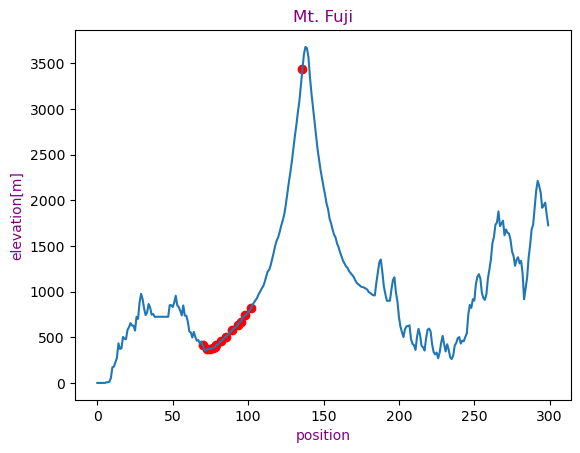

In [16]:

plt.title("Mt. Fuji", c="purple")
plt.xlabel("position", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(points_of_descent, fuji[points_of_descent, 3], c="red")
plt.show()

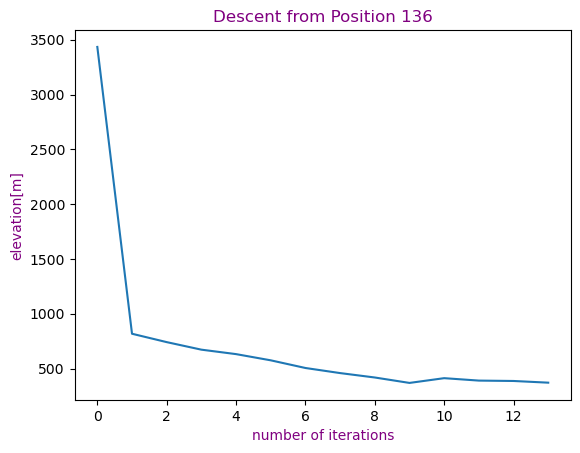

In [17]:
fuji_elevations = fuji[:,3]


plt.title("Descent from Position 136", c="purple")
plt.xlabel("number of iterations", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji_elevations[points_of_descent])
plt.show()

## Problem Six: Change of initial value

In [18]:
descent_path_list = []
for i in range(0,300):
    descent_path_list.append(descend_mountain(i, array_length, alpha=0.2))
descent_path_list

[[0, 1],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6, 5],
 [7],
 [8, 7],
 [9, 1],
 [10, 1],
 [11, 10, 1],
 [12, 2],
 [13, 4],
 [14, 1],
 [15, 27, 31, 51, 41],
 [16, 14, 1],
 [17, 1],
 [18, 22, 13, 4],
 [19, 21, 15, 27, 31, 51, 41],
 [20, 1],
 [21, 15, 27, 31, 51, 41],
 [22, 13, 4],
 [23, 28, 1],
 [24],
 [25, 36, 52, 37, 35, 43],
 [26, 1],
 [27, 31, 51, 41],
 [28, 1],
 [29, 10, 1],
 [30, 41],
 [31, 51, 41],
 [32, 47],
 [33, 27, 31, 51, 41],
 [34, 15, 27, 31, 51, 41],
 [35, 43],
 [36, 52, 37, 35, 43],
 [37, 35, 43],
 [38, 44],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48, 22, 13, 4],
 [49],
 [50, 54, 58, 80],
 [51, 41],
 [52, 37, 35, 43],
 [53, 74],
 [54, 58, 80],
 [55, 63, 74],
 [56, 66, 74],
 [57, 35, 43],
 [58, 80],
 [59],
 [60, 73, 70, 78, 77, 75],
 [61, 83, 80],
 [62, 64, 52, 37, 35, 43],
 [63, 74],
 [64, 52, 37, 35, 43],
 [65, 76, 75],
 [66, 74],
 [67, 66, 74],
 [68, 76, 75],
 [69, 64, 52, 37, 35, 43],
 [70, 78, 77, 75],
 [71, 81, 77, 75],
 [72, 73, 70, 78, 77, 75],
 [

## Problem Seven: Visualization of the descent process for some initial values

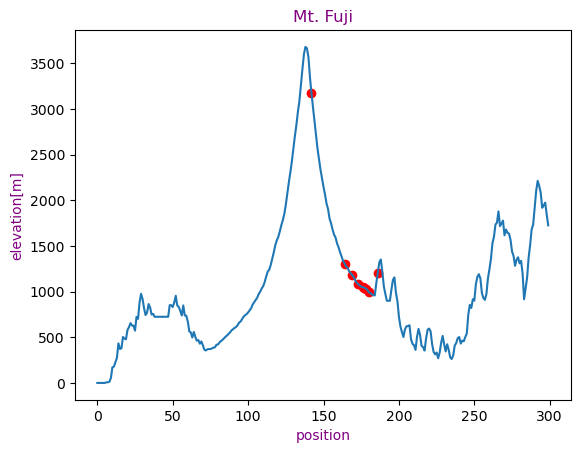

[142, 177, 178, 180, 186, 164, 169, 173, 176]

In [19]:
# Showing the descent from point 142
plt.title("Mt. Fuji", c="purple")
plt.xlabel("position", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(descent_path_list[142], fuji[descent_path_list[142], 3], c="red")
plt.show()
descent_path_list[142]

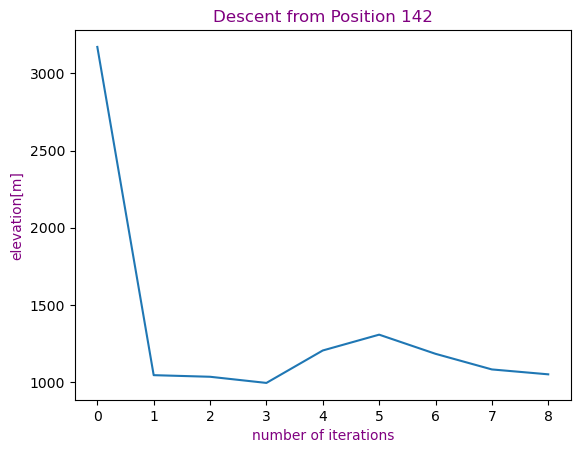

In [20]:
fuji_elevations = fuji[:,3]


plt.title("Descent from Position 142", c="purple")
plt.xlabel("number of iterations", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji_elevations[descent_path_list[142]])
plt.show()

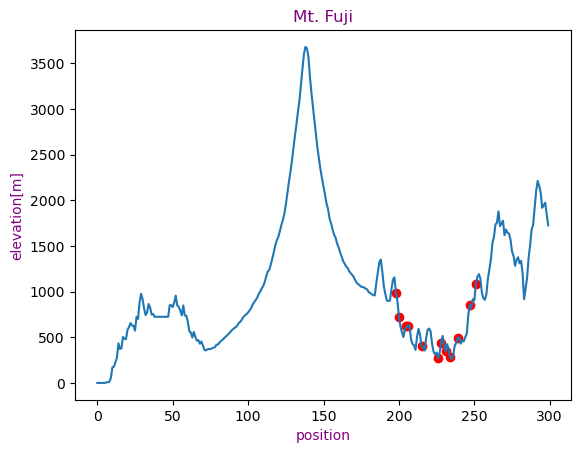

[200, 234, 251, 215, 239, 228, 206, 205, 198, 231, 247, 226]

In [21]:
# Showing the descent from point 200
plt.title("Mt. Fuji", c="purple")
plt.xlabel("position", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(descent_path_list[200], fuji[descent_path_list[200], 3], c="red")
plt.show()
descent_path_list[200]

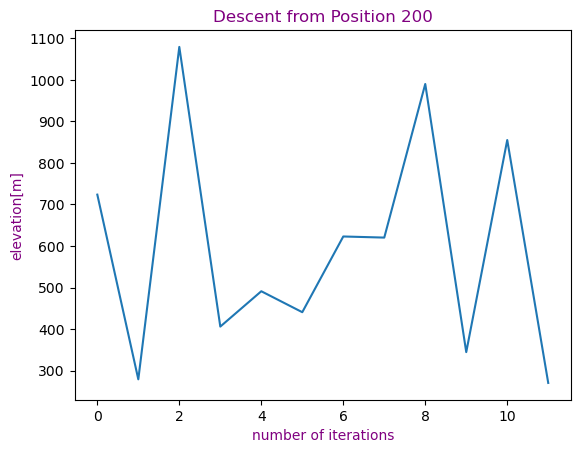

In [22]:
fuji_elevations = fuji[:,3]


plt.title("Descent from Position 200", c="purple")
plt.xlabel("number of iterations", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji_elevations[descent_path_list[200]])
plt.show()

## Problem Eight: (Advance problem) Hyperparameter changes

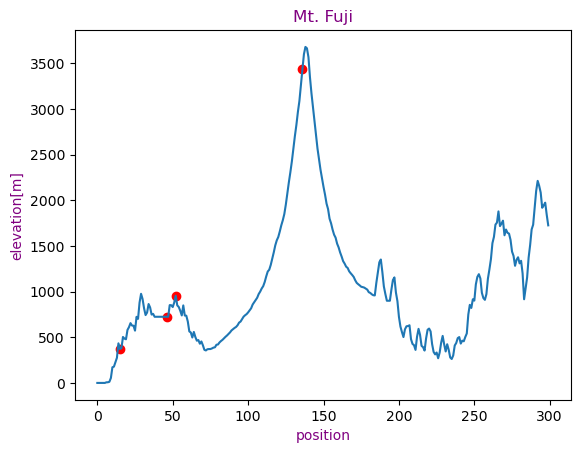

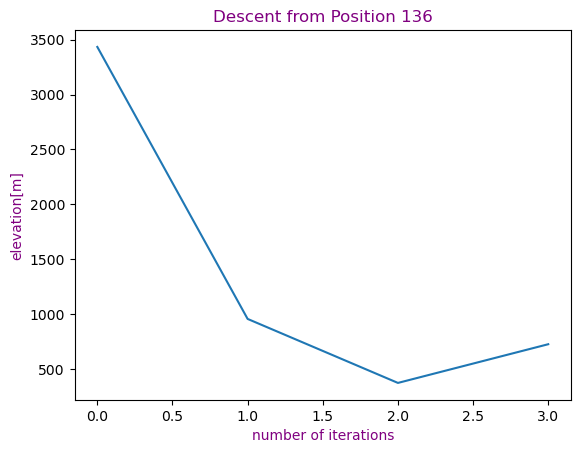

In [23]:
# visualising the descent process when we change the hyperparameter from 0.2 to 0.5
points_of_descent = descend_mountain(136, array_length, alpha=0.5)


plt.title("Mt. Fuji", c="purple")
plt.xlabel("position", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(points_of_descent, fuji[points_of_descent, 3], c="red")
plt.show()

fuji_elevations = fuji[:,3]


plt.title("Descent from Position 136", c="purple")
plt.xlabel("number of iterations", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji_elevations[points_of_descent])
plt.show()

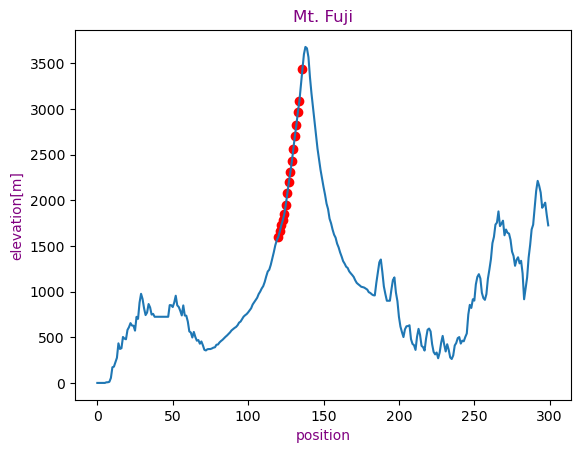

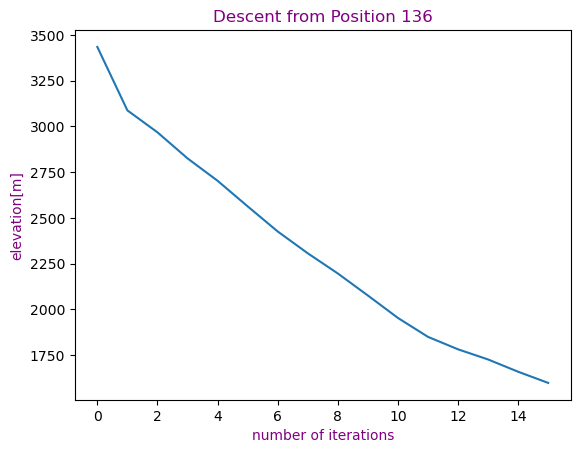

In [24]:
# visualising the descent process when we change the hyperparameter from 0.2 to 0.01
points_of_descent = descend_mountain(136, array_length, alpha=0.01)


plt.title("Mt. Fuji", c="purple")
plt.xlabel("position", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji[:,0], fuji[:,3])
plt.scatter(points_of_descent, fuji[points_of_descent, 3], c="red")
plt.show()

fuji_elevations = fuji[:,3]


plt.title("Descent from Position 136", c="purple")
plt.xlabel("number of iterations", c="purple")
plt.ylabel("elevation[m]", c="purple")
plt.plot(fuji_elevations[points_of_descent])
plt.show()